# 介绍

## 求解一般一阶方程组的简单方法

考虑系统

\begin{equation}
    \begin{cases}
        \dot{y} = f(t, y) \\
        y(t_0) = y_0
    \end{cases}
\end{equation}

### 显 $Euler$ 法

 显 $ Euler $ 法迭代公式:
\begin{equation}
    y_1 = y_0 + h \cdot  f(t, y_0)
\end{equation}


 自治系统的显 $ Euler $ 程序

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def explicit_euler(model):
    y_cur = model.y0
    for i in range(model.epoch):
        y_cur = y_cur + model.h * model.f(y_cur)
        model.add_res(y_cur)
    return model.get_res()

###  隐 $Euler$ 法  

 隐 $ Euler $ 法迭代公式:   
\begin{equation}
    y_1 = y_0 + h \cdot f(t, y_1)
\end{equation}

 自治系统的隐 $ Euler $ 程序

In [3]:
from scipy.optimize import fsolve

In [4]:
def implicit_euler(model):
    y_cur = model.y0
    for i in range(model.epoch):
        fc = lambda x: y_cur + model.h * model.f(x) - x
        y_cur = fsolve(fc, y_cur)
        model.add_res(y_cur)
    return model.get_res()

### 隐中点法

隐中点法 迭代公式:    
\begin{equation}
    y_1 = y_0 + h \cdot f(t , \dfrac{ y_0 + y_1 }{2})
\end{equation}

自治系统的隐中点法程序

In [5]:
def implicit_midpoint(model):
    y_cur = model.y0
    for i in range(model.epoch):
        fc = lambda x: y_cur + model.h * model.f( (y_cur + x) / 2 ) - x
        y_cur = fsolve(fc, y_cur)
        model.add_res(y_cur)
    return model.get_res()

## 求解分离系统的简单方法     
考虑系统:  
\begin{equation}
    \begin{cases}
        \dot{u} = a(u, v) \\
        \dot{v} = b(u, v)
    \end{cases}
\end{equation}

### 辛 $ Euler $ 法

辛 $ Euler $ 法迭代公式:

- 
\begin{equation}
    \begin{cases}
    u_{n+1} = u_n + ha(u_n, v_{n+1} \ ) \\
    v_{n+1} = v_n + hb(u_n, v_{n+1} \ ) 
    \end{cases}
\end{equation}

- 
\begin{equation}
    \begin{cases}
    u_{n+1} = u_n + ha(u_{n+1}\ , v_{n} \ ) \\
    v_{n+1} = v_n + hb(u_{n+1}\ , v_{n} \ ) 
    \end{cases}
\end{equation}

自治系统的辛 $ Euler $ 法程序

In [6]:
def symplectic_euler(model):
    tt_l = len(model.y0)
    u_cur, v_cur = model.y0[0: tt_l // 2], model.y0[tt_l // 2:]
    a = lambda u, v: model.f(np.hstack((u, v)))[0: tt_l // 2]
    b = lambda u, v: model.f(np.hstack((u, v)))[tt_l // 2 :]
    for i in range(model.epoch):
        fc = lambda x: np.array([
            x[0: tt_l // 2]  - u_cur - model.h * a(u_cur, x[tt_l // 2 :]),
            x[tt_l // 2:] - v_cur - model.h * b(u_cur, x[tt_l // 2 :])
        ]).flatten()
        uv = fsolve(fc, np.hstack((u_cur, v_cur)))
        model.add_res(uv)
        u_cur, v_cur = uv[0: tt_l // 2], uv[tt_l // 2:]
    return model.get_res()

## 求解二阶系统的简单方法

考虑系统 
\begin{equation}
    \ddot{q} = f(q)
\end{equation}

### 变量替换

容易知道,可以使用变量替换 $ p = \dot{q} $, 从而将上述二阶系统改写为一阶系统:

\begin{equation}
    \begin{cases}
        \dot{p} = f(q) \\
        \dot{q} = p
    \end{cases}
\end{equation}

利用上述求解一阶系统的方法对上述方程进行求解

### $ St\ddot{o}rmer-Verlet $ 方法

$ St\ddot{o}rmer-Verlet \quad$ 单步法迭代公式:
\begin{equation}
    \begin{cases}
        p_{n+1/2} = p_n + \frac{h}{2}f(q_n) \\
        q_{n+1} = q_n +hp_{n+1/2} \\
        p_{n+1} = p_{n+1 / 2} + \frac{h}{2}f(q_{n+1})
    \end{cases}
\end{equation}

$ St\ddot{o}rmer-Verket \quad$  法程序

In [7]:
def stormer_verlet(model):
    tt_l = len(model.y0)
    p_cur, q_cur = model.y0[0: tt_l // 2], model.y0[tt_l // 2:]
    for i in range(model.epoch):
        p_mid = p_cur + (model.h / 2) * model.f_stormer(q_cur)
        q_cur = q_cur + model.h * p_mid
        p_cur = p_mid + (model.h / 2) * model.f_stormer(q_cur)
        model.add_res(np.hstack((p_cur, q_cur)))
    return model.get_res()

# 简单模型问题

## $ Lotka-Volterra $ 模型

\begin{equation}
    \begin{cases}
        \dot{u} = u (v - 2) \\
        \dot{v} = v(1 - u )  \\
    \end{cases}
\end{equation}

$Lotal-Vikterra \quad$ 模型有如下首次积分:

\begin{equation}
    lnu - u + 2lnv - v = C
\end{equation}

等值线如下:

In [8]:
# 方便起见定义等势线绘制函数
def my_draw_contour(func, var1_devid, var2_devid, curve_number = 10, is_ilustrate = True):
    x = np.linspace(var1_devid[0],  var1_devid[1],  var1_devid[2]) 
    y = np.linspace(var2_devid[0], var2_devid[1],  var2_devid[2])
    X, Y = np.meshgrid(x, y); Z = func(X, Y)
    ctor = plt.contour(X, Y, Z, curve_number)
    if is_ilustrate:
        plt.clabel(ctor)

# 为了数值模拟定义绘制解曲线的函数
def draw_numeric(res_record, color = "red", marker = None):
    x_plt = []; y_plt = []
    for point in res_record:
        x_plt.append(point[0]); y_plt.append(point[1])
    plt.plot(x_plt, y_plt, color = color, marker = marker)

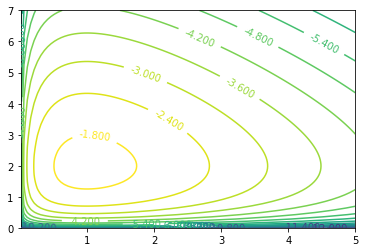

In [9]:
f_lotka = lambda u,v: np.log(u) - u + 2 * np.log(v) - v
my_draw_contour(f_lotka, (0.01, 5, 100), (0.01, 7, 100), curve_number = 20)
plt.show()

### 数值模拟

分别利用 显 $ Euler $ 法; 隐 $ Euler $ 法; 辛 $ Euler $ 法求解上述系统,规定各个方法的初始条件以及迭代次数如下:   

- 显 $ Euler $ 法: $ h = 0.12 \quad (u_0, v_0) = (2, 2) \quad epoch = 100 $
- 隐 $ Euler $ 法: $ h = 0.12 \quad (u_0, v_0) = (4, 8) \quad epoch = 100 $
- 辛 $ Euler $ 法: $ h = 0.12 \quad (u_0, v_0) = (6, 2) \quad epoch = 100 $

并在相空间中绘制出数值解曲线

### 设置模型参数

In [10]:
class Lotka:
    def __init__(self, t0, y0, h, epoch):
        self.t0 = t0
        self.y0 = y0 
        self.h = h
        self.epoch = epoch
        self.res = [self.y0]
    
    def t_mesh(self):
        end = self.t0 + self.epoch * self.h
        t = np.linspace(self.t0, end + self.h, self.epoch + 1)
        return t
    
    def f(self, y):
        return np.array([y[0] * (y[1] - 2), y[1] * (1 - y[0])])
    
    def add_res(self, y):
        self.res.append(y)
    
    def get_res(self):
        return self.res

### 测试程序

In [11]:
def lotka_test():
    # 初始化
    t0 = [0, 0, 0]
    y0 = [np.array([2, 2]), np.array([4, 8]), np.array([6, 2])]
    h = [0.12, 0.12, 0.12]
    epoch = [100, 100, 100]
    
    lotka_exp_euler = Lotka(t0[0], y0[0], h[0], epoch[0])
    lotka_imp_euler = Lotka(t0[1], y0[1], h[1], epoch[1])
    lotka_symp_euler = Lotka(t0[2], y0[2], h[2], epoch[2])
    
    # 求解
    exp_euler_res = explicit_euler(lotka_exp_euler)
    imp_euler_res = implicit_euler(lotka_imp_euler)
    symp_euler_res = symplectic_euler(lotka_symp_euler)
    
    # 可视化
    plt.figure(figsize = (12, 4))
    plt.subplot(131)
    my_draw_contour(f_lotka, (0.01, 8, 100), (0.01, 7, 100), curve_number = 20)
    draw_numeric(exp_euler_res, marker = 'x')
    plt.title('explicit euler solution')
    
    plt.subplot(132)
    my_draw_contour(f_lotka, (0.01, 7, 100), (0.01, 8, 100), curve_number = 20)
    draw_numeric(imp_euler_res, marker = 'x')
    plt.title('implicit euler solution')
    
    plt.subplot(133)
    my_draw_contour(f_lotka, (0.01, 7, 100), (0.01, 9, 100), curve_number = 20)
    draw_numeric(symp_euler_res, marker = 'x')
    plt.title('symplectic euler solution')
    plt.show()

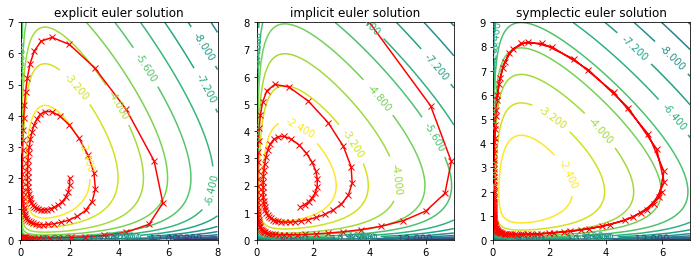

In [12]:
lotka_test()

## 单摆模型

单摆模型由如下系统给出

\begin{equation}
    \begin{cases}
        \dot{p} = - sinq \\
        \dot{q} = p
    \end{cases}
\end{equation}

单摆模型作为哈密顿系统有如下守恒量

\begin{equation}
    H(p, q) = \dfrac{1}{2} p^2 - cosq
\end{equation}

等值线如下:


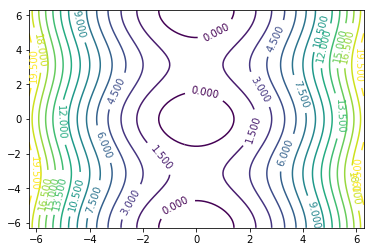

In [13]:
f_pendulum = lambda p, q: 0.5 * p**2 - np.cos(q)
my_draw_contour(f_pendulum, (-2 * np.pi, 2 * np.pi, 100), (-2 * np.pi, 2 * np.pi, 100), curve_number = 20)
plt.show()

### 数值模拟

在上述单摆模型中 取初始迭代点 $(0, \dfrac{\pi}{2})$, 时间步长0.15, 迭代次数100次, 分别利用 显 $Euler$, 隐中点, 辛 $Euler$方法对上述

系统进行求解, 在相空间中绘制出积分曲线.

### 设置模型参数

In [14]:
class Pendulum:
    def __init__(self, t0, y0, h, epoch):
        self.t0 = t0
        self.y0 = y0 
        self.h = h
        self.epoch = epoch
        self.res = [self.y0]
    
    def t_mesh(self):
        end = self.t0 + self.epoch * self.h
        t = np.linspace(self.t0, end + self.h, self.epoch + 1)
        return t
    
    def f(self, y):
        return np.array([-np.sin(y[1]), y[0]])
    
    def add_res(self, y):
        self.res.append(y)
    
    def get_res(self):
        return self.res

### 测试程序

In [15]:
def pendulum_test():
    # 初始化
    t0 = [0, 0, 0]
    y0 = [np.array([0, np.pi / 2]), np.array([0, np.pi / 2]), np.array([0, np.pi / 2])]
    h = [0.15, 0.15, 0.15]
    epoch = [100, 100, 100]
    
    pendulum_exp_euler = Pendulum(t0[0], y0[0], h[0], epoch[0])
    pendulum_imp_mid = Pendulum(t0[1], y0[1], h[1], epoch[1])
    pendulum_symp_euler = Pendulum(t0[2], y0[2], h[2], epoch[2])
    
    # 求解
    exp_euler_res = explicit_euler(pendulum_exp_euler)
    imp_mid_res = implicit_midpoint(pendulum_imp_mid)
    symp_euler_res = symplectic_euler(pendulum_symp_euler)
    
    # 
    plt.figure(figsize = (12, 4))
    plt.subplot(131)
    my_draw_contour(f_pendulum, (- np.pi , np.pi , 100), (-2 * np.pi, 2 * np.pi, 100), curve_number = 10)
    draw_numeric(exp_euler_res, marker = 'x')
    plt.title('explicit euler solution')
    
    plt.subplot(132)
    my_draw_contour(f_pendulum, (-  np.pi , np.pi , 100), (-2 * np.pi, 2 * np.pi, 100), curve_number = 10)
    draw_numeric(imp_mid_res, marker = 'x')
    plt.title('implicit midpoint solution')
    
    plt.subplot(133)
    my_draw_contour(f_pendulum, (- np.pi , np.pi , 100), (-2 * np.pi, 2 * np.pi, 100), curve_number = 10)
    draw_numeric(symp_euler_res, marker = 'x')
    plt.title('symplectic euler solution')
    plt.show()

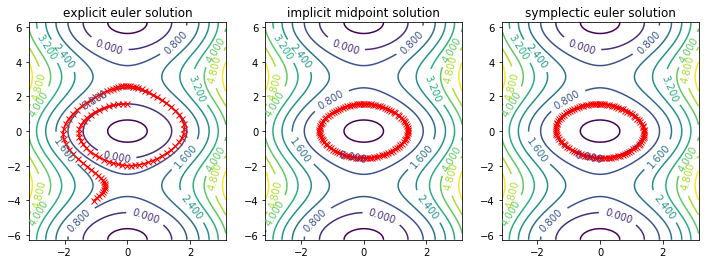

In [16]:
pendulum_test()

## Kepler 模型

$ Kepler 问题 $ 对应的微分方程组:   

\begin{equation}
    \ddot{q}_1 = -\dfrac{q_1}{(q_1^2 + q_2 ^ 2)^{3/2}}   \quad   ,  \quad  \ddot{q}_2 = -\dfrac{q_2}{(q_1^2 + q_2 ^ 2)^{3/2}}
\end{equation}

作变量替换之后, 可得如下一阶系统:

\begin{equation}
    \begin{cases}
        \dot{p_1} = -\dfrac{q_1}{( q_1^2 + q_2 ^ 2)^{3/2}} \\
        \dot{p_2} =  -\dfrac{q_2}{(q_1^2 + q_2 ^ 2)^{3/2}} \\
        \dot{q_1} = p_1 \\
        \dot{q_2} = p_2
    \end{cases}
\end{equation}

$ d = 1 - e^2, e = 0.6 $时该方程组直角坐标系下相空间中的积分曲线由下式出

\begin{equation}
    x^2 + y ^2- (0.64 - 0.6x)^2 = 0
\end{equation} 

绘制真解图像

In [17]:
def show_solution():
    number_of_points = 500
    q1_plt = np.linspace(-1.6, 0.4, number_of_points)
    q2_plt_pos = np.sqrt( (0.64 - 0.6 * q1_plt )**2 - q1_plt**2)
    q2_plt_neg = -q2_plt_pos
    plt.plot(q1_plt, q2_plt_pos, "r",  linewidth = 5, label = "exact flow")
    plt.plot(q1_plt, q2_plt_neg, "r", linewidth=5)

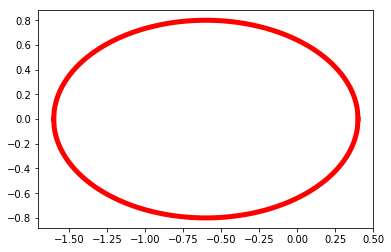

In [18]:
show_solution()

### 数值模拟

分别利用 显 $ Euler $ 法; 辛 $ Euler $ 法; 隐中点法; $St\ddot{o}rmer-Verlet$ 求解上述系统,规定各个方法的初始条件以及迭代次数如下:   

- 显 $ Euler $ 法: $ h = 0.0005 \quad (p_1, p_2, q_1, q_2) = (0, 2, 0.4, 0) \quad epoch = 400000 $
- 辛 $ Euler $ 法: $ h = 0.05 \quad (p_1, p_2, q_1, q_2) = (0, 2, 0.4, 0) \quad epoch = 4000 $
- 隐中点法: $ h = 0.05 \quad (p_1, p_2, q_1, q_2) = (0, 2, 0.4, 0) \quad epoch = 4000 $
- $St\ddot{o}rmer-Verlet : h = 0.05 \quad (p_1, p_2, q_1, q_2) = (0, 2, 0.4, 0) \quad epoch = 4000 $

并在相空间中绘制出数值解曲线

绘制 显 $ Euler $ 法; 辛 $ Euler $ 法;在求解过程中的能量变化曲线    
绘制 显 $ Euler $ 法; 辛 $ Euler $ 法;在求解过程中与真解的误差曲线

### 积分曲线的模拟

In [19]:
class Kepler1:
    def __init__(self, t0, y0, h, epoch):
        self.t0 = t0
        self.y0 = y0 
        self.h = h
        self.epoch = epoch
        self.res = [self.y0[2:4]]
    
    def t_mesh(self):
        end = self.t0 + self.epoch * self.h
        t = np.linspace(self.t0, end + self.h, self.epoch + 1)
        return t
    
    # 一般的一阶数系统的右端函数
    def f(self, y):
        p1 = y[0]; p2 = y[1] ; q1 = y[2]; q2 = y[3]
        return np.array([-q1 / (q1**2 + q2**2)**1.5, -q2 / (q1**2 + q2**2)**1.5, p1, p2])
    
    # 用于 stormer-verlert 迭代构造的函数
    def f_stormer(self, y):
        return np.array([-y[0] / (y[0] ** 2 + y[1] ** 2)**1.5, -y[1] / (y[0] ** 2 + y[1] ** 2)**1.5])
    
    def solution(self, t):
        phi = [0]
        solution = []
        for i in range(len(t)):
            f = lambda phi: 4 * np.arctan(np.tan(phi / 2) / 2) \
            - 4.8 * (np.tan( phi / 2) / ( np.tan(phi / 2) ** 2 + 4)) - t[i]
            phi2 = fsolve(f, phi[i])
            phi.append(phi2)
            solution.append(np.array([0.64 * np.cos(phi2) / (1 + 0.6 * np.cos(phi2)),
                                   0.64 * np.sin(phi2) / (1 + 0.6 * np.cos(phi2))]).flatten())
        return solution 
       
    def add_res(self, y):
        self.res.append(y[2:4])
    
    def get_res(self):
        return self.res

### 测试程序1

In [20]:
# 可视化
def kepler_test1():
    # 初始化
    t0 = [0, 0, 0, 0]
    y0 = [np.array([0, 2, 0.4, 0]), np.array([0, 2, 0.4, 0]), np.array([0, 2, 0.4, 0]), np.array([0, 2, 0.4, 0])]
    h = [0.0005, 0.05, 0.05, 0.05]
    epoch = [400000, 4000, 4000, 4000]
    
    kepler_exp_euler = Kepler1(t0[0], y0[0], h[0], epoch[0])
    kepler_symp_euler = Kepler1(t0[1], y0[1], h[1], epoch[1])
    kepler_imp_mid = Kepler1(t0[2], y0[2], h[2], epoch[2])
    kepler_stormer = Kepler1(t0[3], y0[3], h[3], epoch[3])
    
    # 求解
    exp_euler_res = explicit_euler(kepler_exp_euler)
    symp_euler_res = symplectic_euler(kepler_symp_euler)
    imp_mid_res = implicit_midpoint(kepler_imp_mid)
    stormer_res = stormer_verlet(kepler_stormer)
    
    # 
    plt.figure(figsize = (10, 8))
    plt.subplot(221)
    show_solution()
    draw_numeric(exp_euler_res, color = 'g')
    plt.title('explicit euler solution')
    
    plt.subplot(222)
    show_solution()
    draw_numeric(symp_euler_res, color = 'g')
    plt.title('symplectic euler solution')
    
    plt.subplot(223)
    show_solution()
    draw_numeric(imp_mid_res, color = 'g')
    plt.title('implicit midpoint solution')
    
    plt.subplot(224)
    show_solution()
    draw_numeric(stormer_res, color = 'g')
    plt.title('stormer verlet solution')
    
    plt.show()

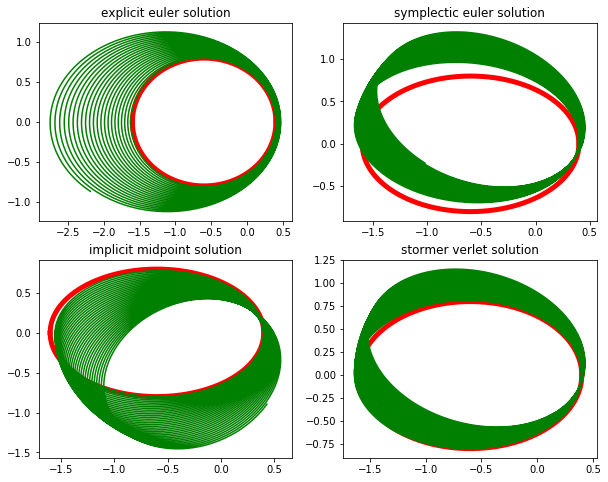

In [21]:
kepler_test1()

### 绘制显 $Euler$ 法和辛 $Euler$ 法的误差和能量曲线

In [22]:
# 重新定义模型参数如下
class Kepler2:
    def __init__(self, t0, y0, h, epoch):
        self.t0 = t0
        self.y0 = y0 
        self.h = h
        self.epoch = epoch
        self.res = [self.y0]
    
    def t_mesh(self):
        end = self.t0 + self.epoch * self.h
        t = np.linspace(self.t0, end + self.h, self.epoch + 1)
        return t
    
    def f(self, y):
        p1 = y[0]; p2 = y[1] ; q1 = y[2]; q2 = y[3]
        return np.array([-q1 / (q1**2 + q2**2)**1.5, -q2 / (q1**2 + q2**2)**1.5, p1, p2])
    
    # Hamiltonian 能量函数定义
    def H(self, y):
        return 0.5 * (y[0] ** 2 + y[1] ** 2) - 1 / np.sqrt(y[2] ** 2 + y[3] ** 2)
    
    def add_res(self, y):
        self.res.append(y)
    
    def get_res(self):
        return self.res

### 测试程序2

In [23]:
def kepler_test2():
    # 初始化
    t0 = [0, 0]
    y0 = [np.array([0, 2, 0.4, 0]), np.array([0, 2, 0.4, 0])]
    h = [0.0001, 0.001]
    epoch = [1000000, 100000]
    
    kepler_exp_euler = Kepler2(t0[0], y0[0], h[0], epoch[0])
    kepler_symp_euler = Kepler2(t0[1], y0[1], h[1], epoch[1])
    
    # 获取时间网格， 数值解能量, 真实能量
    t_exp_euler = kepler_exp_euler.t_mesh()
    t_symp_euler = kepler_symp_euler.t_mesh()
      
    exp_euler_res = explicit_euler(kepler_exp_euler)
    symp_euler_res = symplectic_euler(kepler_symp_euler)
    
    H0 = kepler_symp_euler.H(y0[0])
    H_real = np.full_like(t_exp_euler ,H0)
    H_exp_euler = np.zeros_like(t_exp_euler)
    H_symp_euler = np.zeros_like(t_symp_euler)
     
    for i in range(len(H_exp_euler)):
        H_exp_euler[i] = kepler_exp_euler.H(exp_euler_res[i])
    
    for j in range(len(H_symp_euler)):
        H_symp_euler[j] = kepler_symp_euler.H(symp_euler_res[j])
        

    # 
    plt.figure(figsize = (40, 5))
    ax1 = plt.subplot(121)
    ax1.plot(t_exp_euler, H_exp_euler, label = 'explicit euler energy')
    ax1.plot(t_symp_euler, H_symp_euler, label = 'simplectic euler energy')
    ax1.plot(t_exp_euler, H_real, label = 'real_energy')
    plt.legend()
    plt.title('conservation of energy')
    
    plt.show()

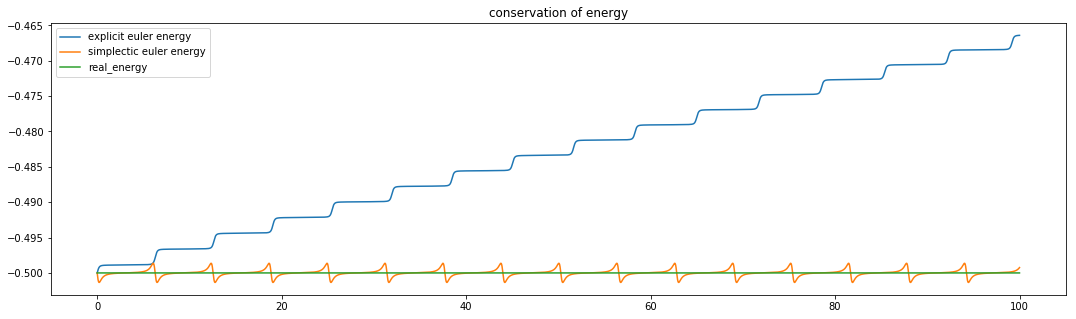

In [24]:
kepler_test2()

### 测试程序3

In [25]:
# 定义误差函数 
def loss_comp(solution, y):
    loss = np.zeros(len(solution), dtype = np.float64)
    for i in range(len(solution)):
        loss[i] = np.linalg.norm(solution[i] - y[i])
    return loss


def kepler_test3():
    # 初始化
    t0 = [0, 0]
    y0 = [np.array([0, 2, 0.4, 0]), np.array([0, 2, 0.4, 0])]
    h = [0.0001, 0.001]
    epoch = [1000000, 100000]
    
    kepler_exp_euler = Kepler1(t0[0], y0[0], h[0], epoch[0])
    kepler_symp_euler = Kepler1(t0[1], y0[1], h[1], epoch[1])
    
    # 获取时间网格， 数值解, 真实解
    t_exp_euler = kepler_exp_euler.t_mesh()
    t_symp_euler = kepler_symp_euler.t_mesh()
      
    exp_euler_res = explicit_euler(kepler_exp_euler)
    symp_euler_res = symplectic_euler(kepler_symp_euler)
    
    
    solution_exp = kepler_exp_euler.solution(t_exp_euler)
    solution_symp = kepler_symp_euler.solution(t_symp_euler)
         
    loss_exp_euler = loss_comp(solution_exp, exp_euler_res)
    loss_symp_euler = loss_comp(solution_symp, symp_euler_res)
        

    # 
    plt.figure(figsize = (40, 5))
    ax1 = plt.subplot(121)
    ax1.plot(t_exp_euler, loss_exp_euler, label = 'explicit euler loss')
    ax1.plot(t_symp_euler, loss_symp_euler, label = 'symplectic euler loss')

    plt.legend()
    plt.title('error')
    
    plt.show()

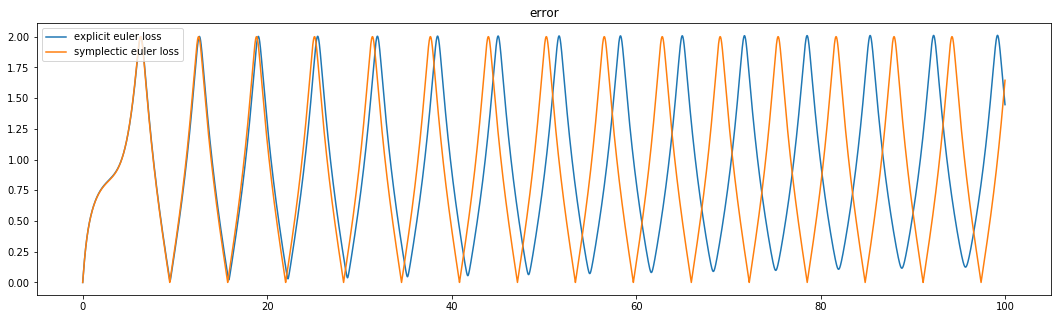

In [26]:
kepler_test3()

??????????这个那本书上怎么画的。。。。画不出来难受啊

 ## 外太阳系系统

考虑对 描述 5 个和太阳相关的外行星的运动的系统使用数值方法,该系统的哈密顿函数如下:

\begin{equation}
    H(p, q) = \frac{1}{2}\sum\limits_{i = 0}^5 \frac{1}{m_i}p_i^Tp_i - G\sum\limits_{i = 1}^5 \sum\limits_{j=0}^{i-1} \frac{m_i \ m_j}{\|q_i - q_j\|}
\end{equation}

其中

\begin{equation}
    \begin{cases}
        p = (p_0, p_1, p_2, p_3, p_4, p_5) & p_i \in R^3 \\ 
        q = (p_0, q_1, q_2, q_3, q_4, q_5) & q_i \in R^3
    \end{cases}
\end{equation}

$m_i 表示 行星和太阳的相对质量$

取太阳的相对质量: $ m_0 = 1.00000597682 $

取万有引力常数: $ G = 2.95912208286 \times 10^{-4}$

取太阳的初始位置和速度: $ q_0(0) = (0, 0, 0) \quad \dot{q_0}(0) = (0, 0, 0)$

其余五个行星和太阳的相对质量以及初始条件如下:

- $Jupiter \quad m_1 = 0.000954786104043 \quad  q_1(0) = (-3.5023653, -3.8169847, -1.5507963) \quad \dot{q_1}(0) = (0.00565429, -0.00412490, -0.00190589)$
- $Saturn \quad m_2 = 0.000285583733151 \quad  q_2(0) = (9.0755314, -3.0458353, -1.6483708) \quad \dot{q_2}(0) = (0.00168318, 0.00483525, 0.00192462)$
- $Uranus \quad m_3 = 0.0000437273164546 \quad  q_3(0) = (8.3101420, -16.2901086, -7.2521278) \quad \dot{q_3}(0) = (0.00354178, 0.00137102, 0.00055029)$
- $Neptune \quad m_4 = 0.0000517759138449 \quad  q_4(0) = (11.4707666, -25.7294829, -10.8169456) \quad \dot{q_4}(0) = (0.00288930, 0.00114527, 0.00039677)$
- $Pluto \quad m_5 = 1/(1.3 \cdot 10^8) \quad  q_5(0) = (-15.5387357, -25.2225594, -3.1902382) \quad \dot{q_5}(0) = (0.00276725, -0.00170702, -0.00136504)$


### 外太阳系数值模拟

分别用显 $ Euler $ 法; 隐 $ Euler $ 法; 辛 $ Euler $ 法; $ St\ddot{o}rmer-Verlet \quad$方法求解上述系统, 在一个时间周期 

(200000 天) 求解上述系统, 时间步长分别如下取值:

- 显 $ Euler $ 法 : h = 10
- 隐 $ Euler $ 法 : h = 10
- 辛 $ Euler $ 法 : h = 100
- $ St\ddot{o}rmer-Verlet \quad $方法 : h = 200


### 设置模型参数

写出原方程对应的一阶系统如下:

\begin{equation}
    \begin{cases}
     \dot{p_k} = - G  \sum\limits_{i = 0 \\ i \neq k}^5\dfrac{m_i \ m_k}{\| q_k - q_i \|^3} (q_k - q_i)      \\
     \dot{q_k} = p_k / m_k
    \end{cases}
\end{equation}

$\dot{p}$ 的数组化定义方式:

定义如下数组: 

\begin{equation}
    -G \begin{pmatrix}
        0 & \dfrac{m_0m_1}{\|q_1 - q_0\|^3}(q_1 - q_0) & \cdots & \dfrac{m_0m_5}{\|q_5 - q_0\|^3}(q_5 - q_0) \\
        \dfrac{m_1m_0}{\|q_0 - q_1\|^3}(q_0 - q_1) & 0 & \cdots & \dfrac{m_1m_5}{\|q_5 - q_1\|^3}(q_5 - q_1) \\
        \dfrac{m_2m_0}{\|q_0 - q_2\|^3}(q_0 - q_2) & \dfrac{m_2m_1}{\|q_1 - q_2\|^3}(q_1 - q_2) & \cdots & \dfrac{m_2m_5}{\|q_5 - q_2\|^3}(q_5 - q_2) \\
         &  \cdots  &  \cdots &  \\ 
        \dfrac{m_5m_0}{\|q_0 - q_5\|^3}(q_0 - q_5) & \dfrac{m_5m_1}{\|q_1 - q_5\|^3}(q_1 - q_5) & \cdots & 0
    \end{pmatrix}
\end{equation}

其中

\begin{equation}
    A[i, 3j :3j + 3] = 
    \begin{cases}
        0 & i = j \\
        \dfrac{m_im_j}{\| q[ 3j : 3j  + 3] - q[3i: 3i + 3] \|}(q[ 3j : 3j  + 3] - q[3i: 3i + 3]) & i \neq j
    \end{cases}
\end{equation}

利用 $sum$ 函数沿着行的方向求和即可

对于利用 $ St\ddot{o}rmer - Verlet $ 方法进行迭代时,把方程改如下:

\begin{equation}
    \begin{cases}
        \dot{v_k} = - G  \sum\limits_{i = 0 \\ i \neq k}^5\dfrac{m_i}{\| q_k - q_i \|^3} (q_k - q_i) \\
        \dot{q_k} = v_k
    \end{cases}
\end{equation}



In [27]:
from scipy.linalg import block_diag
class Outer_Solar:
    def __init__(self, t0, y0, h, m, epoch):
        self.t0 = t0
        self.y0 = y0 
        self.h = h
        self.epoch = epoch
        self.res = [self.y0[18:]]
        self.G = 2.95912208286 * 1e-4
        self.m = m
    
    def t_mesh(self):
        end = self.t0 + self.epoch * self.h
        t = np.linspace(self.t0, end + self.h, self.epoch + 1)
        return t
    
    # 一般的一阶数系统的右端函数
    def f(self, y):     # y : 长度为36的数组
        ttl = len(y)
        lq = ttl // 2
        p = y[0 : ttl // 2]
        q = y[ttl // 2 :]
        
        a = np.ones(3)
        support = block_diag(a, a, a, a, a, a)

        # 创建二维数组 A 
        A = np.zeros((6, 18))
        for i in range(6):
            for j in range(6):
                if i != j:
                    qi = q[3 * i : 3 * i + 3]
                    qj = q[3 * j : 3 * j + 3]
                    A[i,3 * j : 3 * j + 3] = ( (self.m[i] * self.m[j])/ (np.linalg.norm(qj - qi)) ** 3) * (qj - qi)
        # 创建右端项矩阵
        dp = -self.G * np.sum(A, axis = 0)
        dq = p / np.dot(self.m.reshape(1, -1), support).flatten()
        return np.hstack((dp, dq))
    
    # 用于 stormer-verlert 迭代构造的函数
    def f_stormer(self, s):
        A = np.zeros((6, 18))
        for i in range(6):
            for j in range(6):
                if i != j:
                    si = s[3 * i : 3 * i + 3]
                    sj = s[3 * j : 3 * j + 3]
                    A[i,3 * j : 3 * j + 3] = ( (self.m[i] )/ (np.linalg.norm(sj - si)) ** 3 ) * (sj - si)
        ds = -self.G * np.sum( A, axis = 0 )
        return ds
    
       
    def add_res(self, y):
        self.res.append(y[18:])
    
    def get_res(self):
        return self.res
    

### 测试程序

In [28]:
from mpl_toolkits.mplot3d import Axes3D

def draw_numeric_outer(ax, res_record, color = ['r', 'g', 'b', 'm', 'c', 'orange']):
    for i in range(6):
        x_rec = []
        y_rec = []
        z_rec = []
        for j in range(len(res_record)):
            x_rec.append(res_record[j][i * 3])
            y_rec.append(res_record[j][i * 3 + 1])
            z_rec.append(res_record[j][i * 3 + 2])
        ax.plot(x_rec, y_rec, z_rec, color = color[i])
        
def outer_solar_test():
    # 初始化   
    m = np.array([1.00000597682, 0.000954786104043,0.000285583733151,\
                  0.0000437273164546, 0.0000517759138449, 1 / (1.3 * 1e8)])
    t0 = [0, 0, 0, 0]
    v0 = np.array([
        0, 0, 0,
        0.00565429, -0.00412490, -0.00190589,
        0.00168318, 0.00483525, 0.00192462,
        0.00354178, 0.00137102, 0.00055029,
        0.00288930, 0.00114527, 0.00039677,
        0.00276725, -0.00170702, -0.00136504    
    ])
    
    # 将速度初值转换为动量初值
    a = np.ones(3)
    support = block_diag(a, a, a, a, a, a)
    p0 = v0 * np.dot(m.reshape(1, -1), support).flatten()
    
    q0 = np.array([
        0, 0, 0,
        -3.5023653, -3.8169847, -1.5507963,
        9.0755314, -3.0458353, -1.6483708,
        8.3101420, -16.2901086, -7.2521278,
        11.4707666, -25.7294829, -10.8169456,
        -15.5387357, -25.2225594, -3.1902382
    ])
    y0 = np.hstack((p0, q0))
    h = [10, 10, 100, 200]
    epoch = [10000, 5000, 1000, 500]
    
    # 
    outer_exp_euler = Outer_Solar(t0[0], y0, h[0], m, epoch[0])
    outer_imp_euler = Outer_Solar(t0[1], y0, h[1], m, epoch[1])
    outer_symp_euler = Outer_Solar(t0[2], y0, h[2], m, epoch[2])
    
    # stormer-verlet 法初值需要代速度
    outer_stormer = Outer_Solar(t0[3], np.hstack((v0, q0)), h[3], m, epoch[3])  
    
    # 求解
    exp_euler_res = explicit_euler(outer_exp_euler)
    imp_euler_res = implicit_euler(outer_imp_euler)
    symp_euler_res = symplectic_euler(outer_symp_euler)
    stormer_res = stormer_verlet(outer_stormer)

    
    # 绘制积分曲线
    plt.figure(figsize = (20, 10))
    
    ax1 = plt.subplot(221, projection = '3d')
    draw_numeric_outer(ax1, exp_euler_res)
    plt.title('explicit euler solution')
    
    ax2 = plt.subplot(222, projection = '3d')
    draw_numeric_outer(ax2, imp_euler_res)
    plt.xlim(-40, 40)
    plt.ylim(-40, 40)
    plt.title('implicit euler solution')
    
    ax3 = plt.subplot(223, projection = '3d')
    draw_numeric_outer(ax3, symp_euler_res)
    plt.title('symplectic euler solution')
    
    ax4 = plt.subplot(224, projection = '3d')
    draw_numeric_outer(ax4, stormer_res)
    plt.title('stormer verlet solution')
    
    plt.show()

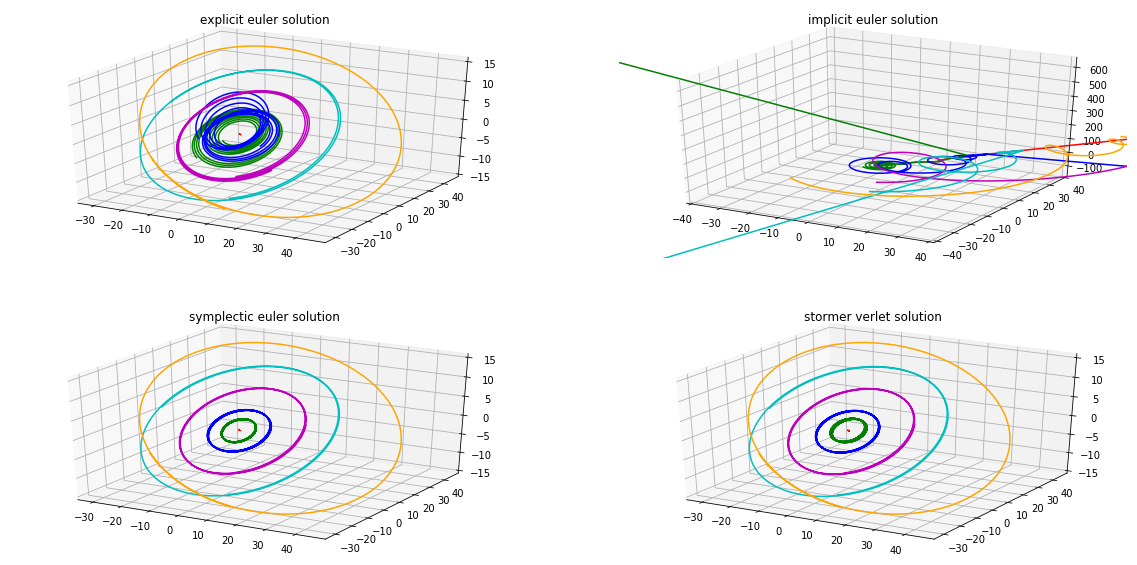

In [29]:
outer_solar_test()

## $Henon-Heiles$ 模型

$Henon - Heiles$ 模型用于描述恒星运动  

在降维之后, 带有两个自由度的哈密顿系统的哈密顿函数如下:

\begin{equation}
    H(p, q) = \dfrac{1}{2}(p_1^2 + p_2^2) + U(q)
\end{equation}

其中, $ U(q) $ 如下选取:

\begin{equation}
    U(q) = \dfrac{1}{2}(q_1^2 + q_2^2) + q_1^2q_2 - \dfrac{1}{3}q_2^3
\end{equation}

势能的等值线如下:

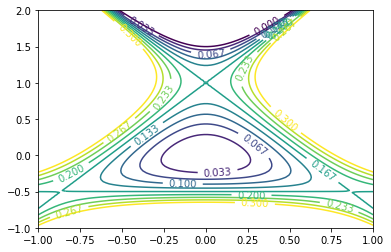

In [30]:
def my_draw_contourhh(func, var1_devid, var2_devid, is_ilustrate = True):
    x = np.linspace(var1_devid[0],  var1_devid[1],  var1_devid[2]) 
    y = np.linspace(var2_devid[0], var2_devid[1],  var2_devid[2])
    X, Y = np.meshgrid(x, y); Z = func(X, Y)
    ctor = plt.contour(X, Y, Z, np.linspace(0, 0.3, 10))
    if is_ilustrate:
        plt.clabel(ctor)
pot_hh = lambda x,y: 0.5 * (x ** 2 + y ** 2) + x**2 * y - (1 / 3) * y ** 3 
my_draw_contourhh(pot_hh, (-1, 1, 100), (-1, 2, 100))
plt.show()

由图,当势能 $ U  = \dfrac{1}{6} $时, $ U $的等值线趋向于等边三角形, 其顶点为 $ U $的鞍点, 势能 $U$ 取为上式时,相应的系统如下:  

\begin{equation}
    \begin{cases}
    \ddot{q_1} = -q_1 - 2q_1q_2 \\ 
    \ddot{q_2}= -q_2 - q_1^2 + q_2^2
    \end{cases}
\end{equation}

或者将上述系统改写为一阶系统如下:

\begin{equation}
    \begin{cases}
        \dot{p_1} = -q_1 - 2q_1q_2 \\
        \dot{p_2} = -q_2 - q_1^2 + q_2^2 \\
        \dot{q_1} = p_1 \\
        \dot{q_2} = p_2 \\
    \end{cases}
\end{equation}

上述系统的解具有非平凡的性质, 对于给定的初值如果使得 $ H(p(0), q(0)) < \dfrac{1}{6} $ 并且 $ q(0) $ 在三角形 $ U \leq \dfrac{1}{6}$ 

### $ Poncare $ 截面数值模拟:  
固定初始能量 $H_0$ 令: $q_{10} = 0 $, 任取 $ P_0 = (q_{20} \ , p_{20} \ ) $, 则可以从哈密顿函数中解出,并取 $p_{10} = \sqrt{2H_0 - 2U_0 - p_{20} ^ 2}$ 沿着数值解走, 直到解再次在正向 $p_1 > 0$ 出现在面 $q_1 = 0$ 上, 此时获取第二个点$ P_1 = (q_{21}, p_{21} \ )$, 同理计算得到: $ P_2 = (q_{22} \ , p_{22} \ ) \cdots$

模拟数据： 

取 $H_0 = \dfrac{1}{12}, h = 10^{-5},q_{10} = 0, \ q_{20} = 0.25, \ p_{20} = -0.15$

$p_{10} = \sqrt{2H_0 - 2U_0 - p_{20} ^ 2}$

利用显$ Euler $ 迭代求解上述系统， 在 $t \in [ 0 , 300000 ]$ 上求解绘制(迭代 $ 3 * 10^{11}$ 次)

跑不动 跑不动。。。。。

## 分子动力学

分子动力学需要哈密顿系统的解, 哈密顿函数如下给出:

\begin{equation}
    H(p, q) = \dfrac{1}{2}\sum\limits_{i = 1}^N \dfrac{1}{m_i}p_i^Tp_i + \sum\limits_{i = 2}^N\sum\limits_{j = 1}^{i - 1}V_{ij}(\|q_i - q_j\|)
\end{equation}

其中:$V_{ij}(r)$ 是给定的势能函数, $q_i$ 表示位置, $p_i$ 表示原子动量, $m_i$ 表示第 $i$ 个原子的质量

在外太阳系系统中, 势能函数由$ V{ij}(r) = -G \dfrac{m_im_j}{r} $给出,在分子动力学中,通常考虑 $Lennard-Jones$ 势能:

\begin{equation}
    V_{ij}(r) = 4 \epsilon_{ij} [ (\dfrac{\sigma_{ij}}{r})^{12} - (\dfrac{\sigma_{ij}}{r})^6 ]  
\end{equation}

其中 $\epsilon_{ij}$ 以及 $\sigma_{ij}$ 是由原子所决定的合适常数

上述势能函数在当 $ r = \sigma{ij}\sqrt[6]{2}$时取得全局极小值, 这个值的含义是: 当 两个原子之间的距离小于这个值时, 由上述势能产

生的力将会排斥两个原子, 当两个原子之间的距离超过这个值时, 由上述势能产生的力将会吸引两个原子.

### 冻结氩晶体的数值模拟

如下图所示在平面上考虑如下排列 7个氩原子之间的相互作用:  

其中一个位于中心, 剩余的留个对称地排列在四周

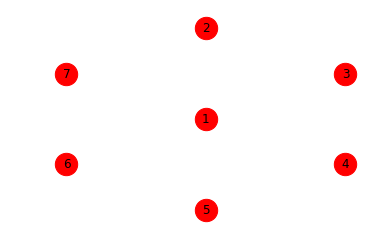

In [31]:
import networkx as nx
G = nx.Graph()
num = 7
nodes = [i for i in range(1, 8)]
G.add_nodes_from(nodes)

coordinates = [[0, 0], [0, 1.5], [0.5, 0.75], [0.5, -0.75], [0, -1.5], [-0.5, -0.75], [-0.5, 0.75]]
vnode= np.array(coordinates)
npos = dict(zip(nodes, vnode))
nlabels = dict(zip(nodes, nodes))
nx.draw_networkx_nodes(G, npos, node_size=500, node_color="red")  
nx.draw_networkx_labels(G, npos, nlabels)  
x_max,y_max = vnode.max(axis=0)  
x_min, y_min = vnode.min(axis=0)  
x_num = (x_max - x_min) / 10
y_num = (y_max - y_min) / 10
# print(x_max, y_max, x_min, y_min)
plt.xlim(x_min - x_num, x_max + x_num)
plt.ylim(y_min - y_num, y_max + y_num)
plt.axis('off')
plt.show()

取哈密顿量即为上述的哈密顿量, $ N = 7$, $m_i = m = 66.34 \cdot 10^{-27}[kg]$

\begin{equation}
    \epsilon_{ij} = \epsilon = 119.8 k_B[J], \quad \sigma_{ij} = \sigma = 0.341[nm]
\end{equation}

其中 $ k_B = 1.380658 \cdot 10^{-23} \ \ [J/K] $为波尔兹曼常数, 质量单位取 $ [kg]$, 长度单位取纳米$ 1[nm] = 10^{-9} \ \ [m] $, 时间单位取纳秒 $ 1[nsec] = 10^{-9} \ \ [sec] $, 各个原子的初始位置 $ [nm] $, 初始速度 $ [nm]/[nsec] $ 在下面给出, 距离的选取按照适当的规则,并且下述距离选取使得系统总动量为0, 因此最中心原子将不会发生移动, 初始位置时刻的能量大约为 $ -1260.2k_B[J] $ 

- 1号: 初始位置: (0.00, 0.00) , 初始速度:(-30, -20)
- 2号: 初始位置: (0.02, 0.39) , 初始速度:(50, -90)
- 3号: 初始位置: (0.34, 0.17) , 初始速度:(-70, -60)
- 4号: 初始位置: (0.36, -0.21) , 初始速度:(90, 40)
- 5号: 初始位置: (-0.02, -0.40) , 初始速度:(80, 90)
- 6号: 初始位置: (-0.35, -0.16) , 初始速度:(-40, 100)
- 7号: 初始位置: (-0.31, 0.21) , 初始速度:(-80, -60)

在对分子动力学系统的计算中, 一般不关心原子的轨迹, 一般对一些宏观量比较感兴趣(如: 温度, 压力, 内能等), 在此处, 考虑哈密顿能量以及温度, 温度的计算公式如下:

\begin{equation}
    T = \dfrac{1}{2Nk_B}\sum\limits_{i = 1}^{N}m_i\|\dot{q_i}\|^2
\end{equation}

模拟要求如下:

- 分别利用显$Euler$法 以及 辛$ Euler $法对上述系统进行求解; 取时间步长分别为 $ 0.5[fec], 10[fec] $ $(1[fec] = 10^{-6} \ \ [nec])$ 在时间区间 $[0, 0.1]$ (即, 分别迭代 200000次, 10000次)上绘制出总能量变化曲线(用 $H(p_n, q_n) - H(p_0, q_0) / k_B$)

- 分别利用显$Euler$法 以及 辛$ Euler $法对上述系统进行求解; 取时间步长分别为 $ 10[fec], 10[fec] $ $(1[fec] = 10^{-6} \ \ [nec])$ 在时间区间 $[0, 0.1]$ (即, 分别迭代 10000次, 10000次)上利用上述温度公式,绘制出温度变化曲线

- 利用$SV$方法进行两次求解,  取时间步长分别为 $ 40[fec], 80[fec] $ $(1[fec] = 10^{-6} \ \ [nec])$ 在时间区间 $[0, 0.1]$ (即, 分别迭代 2500次, 1250次)上绘制出总能量变化曲线(用 $H(p_n, q_n) - H(p_0, q_0) / k_B$)

- 利用$SV$方法进行两次求解,  取时间步长分别为 $ 10[fec], 20[fec] $ $(1[fec] = 10^{-6} \ \ [nec])$ 在时间区间 $[0, 0.1]$ (即, 分别迭代 10000次, 5000次)上绘制出温度变化曲线

将原系统改写如下:

\begin{equation}
    \begin{cases}
        \dot{p_k} = -24 \epsilon \sigma^6 \sum\limits_{i = 1 \\ i \neq k }^7 \dfrac{1}{\|q_k - q_i\|^8}(1 - \dfrac{2 \sigma^6}{\|q_k - q_i\|^6})(q_k - q_i) \\
        \dot{q_k} = p_k / m
    \end{cases}
\end{equation}

对于 SV 方法, 需要将系统改写如下:

\begin{equation}
    \begin{cases}
        \dot{v_k} = -24 \dfrac{\epsilon \sigma^6}{m} \sum\limits_{i = 1 \\ i \neq k }^7 \dfrac{1}{\|q_k - q_i\|^8}(1 - \dfrac{2 \sigma^6}{\|q_k - q_i\|^6})(q_k - q_i) \\
        \dot{q_k} = v_k
    \end{cases}
\end{equation}


### 模型参数

In [32]:
class Md_Model:
    def __init__(self, t0, y0, h, epoch):
        self.t0 = t0
        self.y0 = y0 
        self.h = h
        self.epoch = epoch
        self.res = [self.y0]
        self.kB = 1.380658 * 1e-23
        self.epsilon = 119.8 * self.kB 
        self.sigma = 0.341
        self.m = 66.34 * 1e-27
        self.H0 = -1260.2 * self.kB
        self.T0 = 22.72
    
    def t_mesh(self):
        end = self.t0 + self.epoch * self.h
        t = np.linspace(self.t0, end, self.epoch + 1)
        return t
    
    # 一般的一阶数系统的右端函数
    def f(self, y):     # y : 长度为 28 的数组
        ttl = len(y)
        lq = ttl // 2
        p = y[0 : ttl // 2]
        q = y[ttl // 2 :]
        # 创建二维数组 A 
        A = np.zeros((7, 14))
        for i in range(7):
            for j in range(7):
                if i != j:
                    qi = q[2 * i : 2 * i + 2]
                    qj = q[2 * j : 2 * j + 2]
                    A[i, 2 * j : 2 * j + 2] \
                    = (1 / np.linalg.norm(qj - qi) ** 8) * \
                    (1 - 2 * (self.sigma / np.linalg.norm(qj - qi)) ** 6) * (qj - qi)            
        # 创建右端项矩阵
        dp = -24 * self.epsilon * (self.sigma ** 6) * np.sum(A, axis = 0)
        dq = p / self.m
        return np.hstack((dp, dq))
    
    # 用于 stormer-verlert 迭代构造的函数
    def f_stormer(self, q):
        A = np.zeros((7, 14))
        for i in range(7):
            for j in range(7):
                if i != j:
                    qi = q[2 * i : 2 * i + 2]
                    qj = q[2 * j : 2 * j + 2]
                    A[i, 2 * j : 2 * j + 2] = \
                    (1 / np.linalg.norm(qj - qi) ** 8) \
                    * (1 - 2 * (self.sigma  / np.linalg.norm(qj - qi)) ** 6) * (qj - qi)            
        # 创建右端项矩阵
        res = -24 * self.epsilon * (self.sigma ** 6) * np.sum(A, axis = 0) / self.m
        return res
    
    # y: 28 维数组 
    # y: 0 - 14 分别表示 1-7号 原子的 动量或者速度, 注意搞清迭代获得的是速度分量还是动量
    # y: 14 - 27 分别表示 1-7号原子的 位置坐标
    
    # 下面程序中:
    # switch = 0 时,表示代入的前14个是动量分量
    # switch = 1 时 表示代入的前14个是速度分量
    
    # 势能函数  
    def V(self, r):
        return 4 * self.epsilon * \
    ( (self.sigma / np.linalg.norm(r)) ** 12 - (self.sigma / np.linalg.norm(r)) ** 6 )
    
    # Hamiltonian 能量函数
    def H(self, y, switch = 0):
        if switch == 1:  # 将速度分量转换为动量分量
            p = self.m * y[0:14] 
        else:
            p = y[0: 14]
        q = y[14:]
        
        # 计算总动能 ttm
        rcm = np.zeros(7)
        for i in range(7):
            rcm[i] = np.linalg.norm(p[2 * i : 2 * i + 2]) ** 2
        ttm = np.sum(rcm) / (2 * self.m)
        
        # 计算总势能 ttp
        rcp = np.zeros((6, 6))
        for i in range(6):
            for j in range(6):
                if i >= j:
                    rcp[i, j] = self.V(q[2 * (i+1) : 2 * (i+1) + 2]  -  q[2 * j : 2 * j + 2 ])
        ttp = np.sum(rcp)
        return ttm + ttp
                     
    # 系统温度函数
    def temprature(self, p, switch = 0):
        if switch == 0: # 传入的是动量时, 将动量转换为速度
            v = (p / self.m)[0:14]
        else: 
            v = p[0: 14]
        recv = np.zeros(7)
        for i in range(7):
            recv[i] = np.linalg.norm(v[2 * i : 2 * i + 2]) ** 2
        temprature = np.sum(recv) * (self.m / (2 * 7 * self.kB))
        return temprature
            
    def add_res(self, y):
        self.res.append(y)
    
    def get_res(self):
        return self.res

### 误差函数

In [33]:
def loss_hamiltonian(model, res, switch = 0):
    lth = len(res)
    plt_arr = np.zeros(lth)
    for i in range(lth):
        plt_arr[i] = (model.H(res[i], switch) - model.H0) / model.kB
    return plt_arr


def loss_temprature(model, res, switch = 0):
    lth = len(res)
    plt_arr = np.zeros(lth)
    for i in range(lth):
        plt_arr[i] = model.temprature(res[i], switch) - model.T0
    return plt_arr

### 测试程序1

In [34]:
# 显 Euler 和 辛 Euler 的能量， 温度曲线
def md_test1():
    # 初始化 时间， 速度， 动量， 位置， 时间步长， 迭代次数
    t0 = [0, 0, 0]
    v0 = np.array([
        -30, -20,
        50, -90,
        -70, -60,
        90, 40,
        80, 90,
        -40, 100,
        -80, -60
    ], dtype = np.float64)
    p0 = (66.34 * 1e-27) * v0
    q0 = np.array([
        0.00, 0.00,
        0.02, 0.39,
        0.34, 0.17,
        0.36, -0.21,
        -0.02, -0.40,
        -0.35, -0.16,
        -0.31, 0.21
    ])
    y0 = np.hstack((p0, q0))
    h = [0.5 * 1e-6, 10 * 1e-6, 10 * 1e-6]
    epoch = [50000, 10000, 2500]
    
    # 显 Euler 能量计算
    md_exp_euler1 = Md_Model(t0[0], y0, h[0], epoch[0])
    t_exp_euler1 = md_exp_euler1.t_mesh()
    md_exp_res1 = explicit_euler(md_exp_euler1)
    loss_exp1 = loss_hamiltonian(md_exp_euler1, md_exp_res1)
    
    # 显 Euler 温度计算
    md_exp_euler2 = Md_Model(t0[2], y0, h[2], epoch[2])
    t_exp_euler2 = md_exp_euler2.t_mesh()
    md_exp_res2 = explicit_euler(md_exp_euler2)
    loss_exp2 = loss_temprature(md_exp_euler2, md_exp_res2)
    
    # 辛 Euler 能量, 温度计算
    md_sym_euler1 = Md_Model(t0[1], y0, h[1], epoch[1])
    t_sym_euler1 = md_sym_euler1.t_mesh()
    md_sym_res1 = symplectic_euler(md_sym_euler1)
    loss_sym1 = loss_hamiltonian(md_sym_euler1, md_sym_res1)
    loss_sym2 = loss_temprature(md_sym_euler1, md_sym_res1)
    
    plt.figure(figsize = (18, 4))
    ax1 = plt.subplot(121)
    ax1.plot(t_exp_euler1, loss_exp1, color = 'c', label = 'explicit euler')
    ax1.plot(t_sym_euler1, loss_sym1, color = 'm', label = 'symplectic euler')
    ax1.set_ylim(-60, 60)
    ax1.set_xlim(0, 0.1)
    ax1.legend()
    ax1.set_title('total energy')
     
    ax2 = plt.subplot(122)
    ax2.plot(t_exp_euler2, loss_exp2, color = 'c', label = 'explicit euler')
    ax2.plot(t_sym_euler1, loss_sym2, color = 'm', label = 'symplectic euler')
    ax2.set_ylim(-60, 60)
    ax2.set_xlim(0, 0.1)
    ax2.legend()
    ax2.set_title('temprature')
    
    plt.legend() 
    plt.show()

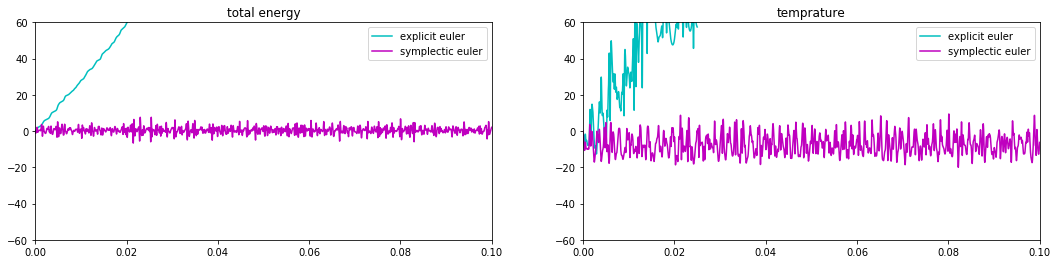

In [35]:
md_test1()

In [36]:
# sv 能量, 温度
def md_test2():
   
    # 初始化 时间， 速度， 位置， 时间步长， 迭代次数
    t0 = [0, 0, 0, 0]
    v0 = np.array([
        -30, -20,
        50, -90,
        -70, -60,
        90, 40,
        80, 90,
        -40, 100,
        -80, -60
    ], dtype = np.float64)
    q0 = np.array([
        0.00, 0.00,
        0.02, 0.39,
        0.34, 0.17,
        0.36, -0.21,
        -0.02, -0.40,
        -0.35, -0.16,
        -0.31, 0.21
    ])
    y0 = np.hstack((v0, q0))
    h = [40 * 1e-6, 80 * 1e-6, 10 * 1e-6, 20 * 1e-6]
    epoch = [2500, 1250, 10000, 5000]

    # sv 能量计算
    md_sv1 = Md_Model(t0[0], y0, h[0], epoch[0])
    t_sv1 = md_sv1.t_mesh()
    md_sv_res1 = stormer_verlet(md_sv1)
    loss_sv1 = loss_hamiltonian(md_sv1, md_sv_res1, 1)
    
    md_sv2 = Md_Model(t0[1], y0, h[1], epoch[1])
    t_sv2 = md_sv2.t_mesh()
    md_sv_res2 = stormer_verlet(md_sv2)
    loss_sv2 = loss_hamiltonian(md_sv2, md_sv_res2, 1)

    # sv 温度计算
    md_sv3 = Md_Model(t0[2], y0, h[2], epoch[2])
    t_sv3 = md_sv3.t_mesh()
    md_sv_res3 = stormer_verlet(md_sv3)
    loss_sv3 = loss_temprature(md_sv3, md_sv_res3, 1)
    
    md_sv4 = Md_Model(t0[3], y0, h[3], epoch[3])
    t_sv4 = md_sv4.t_mesh()
    md_sv_res4 = stormer_verlet(md_sv4)
    loss_sv4 = loss_temprature(md_sv4, md_sv_res4, 1)

    plt.figure(figsize = (18, 8))
    ax1 = plt.subplot(221)
    ax1.plot(t_sv1, loss_sv1, label = 'velert, h = 40[fsc]', color = 'r')
    ax1.legend()
    ax1.set_ylim(-30, 30)
    ax1.set_xlim(0, 0.1)
    ax1.set_title('total energy')

    ax2 = plt.subplot(222)
    ax2.plot(t_sv2, loss_sv2, label = 'velert, h = 80[fsc]',color = 'r')
    ax2.legend()
    ax2.set_ylim(-30, 30)
    ax2.set_xlim(0, 0.1)
    ax2.set_title('total energy')
    
    ax3 = plt.subplot(223)
    ax3.plot(t_sv3, loss_sv3, label = 'velert, h = 10[fsc]', color = 'r')
    ax3.legend()
    ax3.set_ylim(-30, 30)
    ax3.set_xlim(0, 0.1)
    ax3.set_title('temperature')
    
    ax4 = plt.subplot(224)
    ax4.plot(t_sv4, loss_sv4, label = 'velert, h = 20[fsc]', color = 'r')
    ax4.legend()
    ax4.set_ylim(-30, 30)
    ax4.set_xlim(0, 0.1)
    ax4.set_title('temperature')

    plt.show()

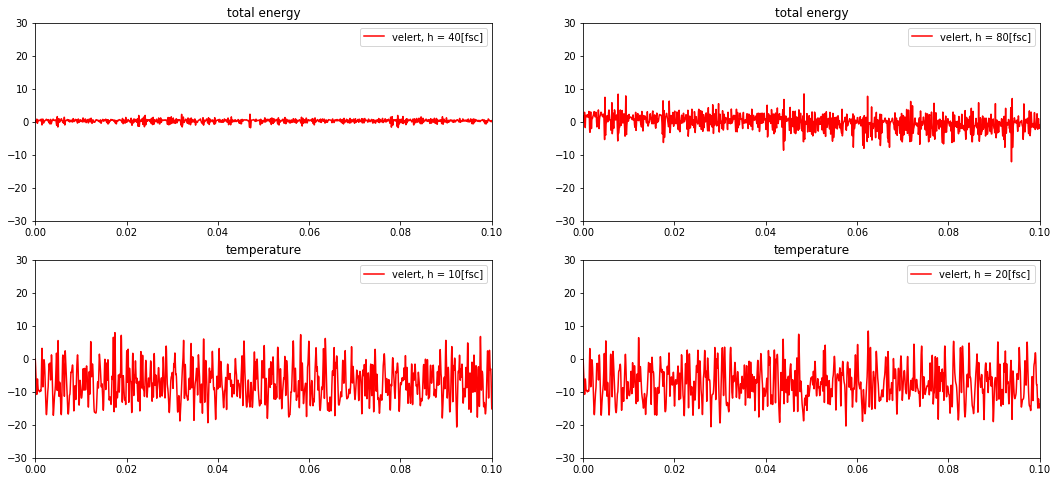

In [37]:
md_test2()

# 高震荡问题

## $ Fermi - Pasta -Ulam$ 问题介绍

考虑将 $ 2 m $ 个质点由非线性轻弹簧以及线性硬弹簧混合连接构成的系统,  并且将端点处固定 $( \ q_0 = q_{2m + 1} \ = 0 \ )$  并且记 $ \ p_i = \dot{q_i} \ $表示质

点的速度,则 该系统为具有如下总能量的哈密顿系统:

\begin{equation}
    H(p, q ) = \dfrac{1}{2}\sum\limits_{i = 1}^{m}( \ p_{2i - 1}^2 \ + \ p_{2i}^2 \ \ )+ \dfrac{\omega^2}{4}\sum\limits_{ i = 1 }^m( \ q_{2i} - q_{2i-1} \ \ )^2 + \sum\limits_{i = 0}^m ( \ q_{2i + 1} \ - q_{2i} \ )^4
\end{equation}

其中,需要假设 $ \omega $ 较大, 自然地, 可以作变量替换如下:

\begin{align}
    x_{0, i} = ( q_{2i} + q_{2i -1} \ \ ) / \sqrt{2} & \qquad x_{1, i} = ( q_{2i} - q_{2i - 1} \ \ ) / \sqrt{2} \\
    y_{0, i} = (p_{2i} + p_{2i - 1} \ \ ) / \sqrt{2} & \qquad y_{1, i} = ( p_{2i} - p_{2i -1} \ \ ) / \sqrt{2}
\end{align}

其中, $ x_{0, i} \ \ $表示第 $ i $ 个刚性弹簧的标度位移, $ x_{1, i} \ \ $表示第$ i $个刚性弹簧的伸长量, $ y_{0, i} \ \  $以及 $ y_{1, i} \ \ $表示速度(或动量)

在上述坐标变换后的新坐标下, 运动被描述为以下哈密顿系统:

\begin{equation}
    H(y, x) = \dfrac{1}{2}\sum\limits_{ i= 1 }^m(y_{0, i}^2 + y_{1, i}^2 \ \ ) + \dfrac{ \omega^2 }{ 2 }\sum\limits_{ i = 1 }^m x_{1, i}^2  + \dfrac{1}{4}[(x_{0, 1} - x_{1, 1} \ )^4 + \sum\limits_{ i = 1 }^{ m - 1 } (x_{0, i+1 } \ - x_{1, i+1} \ - x_{0, i} \ - x_{1, i} \ \ )^4 + (x_{0,m} \ + x_{1, m} \ \ )^4]
\end{equation}

上述运动方程除了哈密顿能量是守恒的以外, 一般还具有一个有趣的特性:  

\begin{equation}
    I_j \ (x_{1, j} \ \  ,\ \ y_{1, j} \ \  ) = \dfrac{1}{2}( y_{ 1, j }^2 \ \ + \ \ \omega^2x_{1, j} \ ^2 \ \ )
\end{equation}

上式描述了第 $ j $个刚性弹簧的能量, 上式表明, 在刚性弹簧之间具有能量的交换, 但是总能量 $ I = I_1 + \cdots + I_m \ $ 一直保持在一个常数 

实际上, 有 $I(x(t), y(t)) = I(x(0), y(0))$



## 经典数值积分方法的应用

当将步长$ h \ \ $和 高频率 $ \omega \ \ $ 作乘积时, 前面所述的方法否还能正确地定性模拟系统?

### 线性稳定性分析:

 为了得到最大容许步长, 忽略 哈密顿函数中的四次项, 则原微分方程将变为两个二维问题:
 
 \begin{align}
     \dot{y}_{0, i} = 0  & \qquad \dot{x}_{0, i} = y_{0, i}   \\
     \dot{y}_{1, i} = -\omega^2x_{1, i}  & \qquad \dot{x}_{1, i} = y_{1, i}
 \end{align}

忽略下标之后, 上述微分方程的解为:

\begin{equation}
    \begin{pmatrix}
        y(t) \\ \omega x(t)
    \end{pmatrix} = 
    \begin{pmatrix}
        \cos{\omega t} & -\sin{\omega t} \\
        \sin{\omega t} & \cos{\omega t}
    \end{pmatrix}
    \begin{pmatrix}
        y(0) \\
        \omega x(0)
    \end{pmatrix}
\end{equation}

对上述系统使用单步法获得的为:

\begin{equation}
    \begin{pmatrix}
        y_{n+1} \\ \omega x_{n+1}
    \end{pmatrix} = 
     M(h \omega)
    \begin{pmatrix}
        y_n \\
        \omega x_n
    \end{pmatrix}
\end{equation}

并且矩阵 $ M(h \omega) $ 的特征值 $ \lambda_i $决定了数值解的长时间的行为.

数值解的稳定性需要特征值的模长不超过1

对显$ \  \ Euler \ \ $能量$ I_n = (y_n^2 + \omega^2x_n^2 \ ) \ / \ 2 \ \ $以 $ ( 1 + h^2 \omega^2)^{n / 2} \ \ $ 增长

对隐$ \  \ Euler \ \ $ 能量 以 $ ( 1 + h^2 \omega^2)^{ - n / 2} \ \ $ 衰减

对于隐中点法, 由于矩阵$ \ \ M(h \omega) \ \ $ 正交, 因此, 能够将 $ I_n $ 在任意时刻精确保持.

对于辛$ Euler $方法以及 $ SV $ 方法, 有:

\begin{equation}
    M(h \omega) = \begin{pmatrix}
        1 & -h \omega \\
        h \omega & 1 - h^2 \omega^2
    \end{pmatrix} 
    \qquad
    M(h \omega) = \begin{pmatrix}
        1 - \dfrac{h^2 \omega^2}{2} & -\dfrac{h \omega}{2}( 1 - \dfrac{h^2\omega^2}{4}) \\
        \dfrac{h \omega }{2} & 1 - \dfrac{h^2 \omega^2}{2}
    \end{pmatrix}
\end{equation}

上述两个方程组的特征多项式均为$ \ \ \lambda^2 - (2 - h^2 \omega^2) \lambda +1 \ \ $,因此特征值的模长小于等于1当且仅当$ |h \omega| \leq 2$

### $ Fermi - Pasta -Ulam$ 问题数值实验

分别利用 隐中点,辛$ Euler $法, $ SV $ 方法 求解上述系统两次, 两次步长分别取为 $ h = 0.001, h =0.03 $ 在 $ t \in [0, 200] $上进行求解  

(即分别迭代200000 , 6667次), 其余参数如下设置:

$ \omega = 50$

$ x_{0, 1 \ }(0) = 1, \qquad y_{0, 1 \ }(0) = 1, \qquad x_{1, 1 \ }(0) = \omega^{-1} = 0.02, \qquad y_{1, 1 \ }(0) = 1$

其余均设置为 0

改写原系统如下: 

\begin{equation}
    \begin{cases}
        \dot{y} = - RHS\\ 
        \dot{x} = y
    \end{cases}
\end{equation}

### 模型参数

In [38]:
class Fpu_Model:
    def __init__(self, t0, y0, h, omega, epoch, N = 3):     # N: 硬弹簧个数 
        self.t0 = t0
        self.y0 = y0 
        self.h = h
        self.omega = omega
        self.epoch = epoch
        self.res = [self.y0]
        self. N = N   
    
    def t_mesh(self):
        end = self.t0 + self.epoch * self.h
        t = np.linspace(self.t0, end, self.epoch + 1)
        return t
    
    # 一般的一阶数系统的右端函数
    def f(self, z):     # z : 长度为 12 的数组
        y = z[0 : 6]
        x = z[6 : ]
        vec = np.array([
            [0, x[1], 0, x[3], 0, x[5]],
            [1, -1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1],
            [1, 1, -1, 1, 0, 0],
            [0, 0, 1, 1, -1, 1]
        ], dtype = np.float64)
        # 编写 y 导数的右端项
        dy = self.omega**2 * vec[0] + (x[0] - x[1])**3 * vec[1] + (x[4] + x[5])**3 * vec[2] \
        + (x[0] + x[1] + x[3] - x[2])**3 * vec[3] + (x[2] + x[3] + x[5] - x[4])**3 * vec[4]
        dx = y
        return np.hstack((-dy, dx))
    
    # 用于 stormer-verlert 迭代构造的函数
    def f_stormer(self, x):
        vec = np.array([
            [0, x[1], 0, x[3], 0, x[5]],
            [1, -1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1],
            [1, 1, -1, 1, 0, 0],
            [0, 0, 1, 1, -1, 1]
        ], dtype = np.float64)
        # 编写 y 导数的右端项
        dy = self.omega**2 * vec[0] + (x[0] - x[1])**3 * vec[1] + (x[4] + x[5])**3 * vec[2] \
        + (x[0] + x[1] + x[3] - x[2])**3 * vec[3] + (x[2] + x[3] + x[5] - x[4])**3 * vec[4]
        return -dy
    
    # z : 12 维数组, z前6个位置表示y分量, z后六个位置表示z分量
    # I
    # pos : 0 - 2
    def I_part(self, z, pos):
        y = z[0 : 6]
        x = z[6 : ]
        return 0.5 * (y[2 * pos + 1]**2 + self.omega**2 * x[2 * pos + 1]**2)
                 
    def add_res(self, y):
        self.res.append(y)
    
    def get_res(self):
        return self.res

### 测试程序:

In [39]:
def draw_fpu(ax, model, numeric, t_mesh):
    len_numeric  = len(numeric)
    I = np.zeros((3, len_numeric))
    
    color_markers = ['m', 'g', 'c']
    for i in range(len_numeric):
        for j in range(3):
            I[j, i] = model.I_part(numeric[i], j)
    I_tt = np.sum(I, axis = 0)

    for i in range(3):
        ax.plot(t_mesh, I[i, :], color = color_markers[i])
    ax.plot(t_mesh, I_tt, color = 'orange')
    

def fpu_test():
    # 初始化
    omega = 50
    t0 = 0
    x0 = np.array([1, omega ** (-1), 0, 0, 0, 0])
    y0 = np.array([1, 1, 0, 0, 0, 0])
    z0 = np.hstack((y0, x0))
    h = [0.001, 0.03]
    epoch = [200000, 6667]
    
    fpu_impmidp1 = Fpu_Model(t0, z0, h[0], omega, epoch[0])
    t_mesh1 = fpu_impmidp1.t_mesh()
    fpu_impmidp_res1 = implicit_midpoint(fpu_impmidp1)
    
    fpu_symp1 = Fpu_Model(t0, z0, h[0], omega, epoch[0])
    fpu_symp_res1 = symplectic_euler(fpu_symp1)
    
    fpu_sv1 = Fpu_Model(t0, z0, h[0], omega, epoch[0])
    fpu_sv_res1 = stormer_verlet(fpu_sv1)
    
    fpu_impmidp2 = Fpu_Model(t0, z0, h[1], omega, epoch[1])
    t_mesh2 = fpu_impmidp2.t_mesh()
    fpu_impmidp_res2 = implicit_midpoint(fpu_impmidp2)
    
    fpu_symp2 = Fpu_Model(t0, z0, h[1], omega, epoch[1])
    fpu_symp_res2 = symplectic_euler(fpu_symp2)
    
    fpu_sv2 = Fpu_Model(t0, z0, h[1], omega, epoch[1])
    fpu_sv_res2 = stormer_verlet(fpu_sv2)
    
    plt.figure(figsize = (18, 8))
    ax1 = plt.subplot(231)
    draw_fpu(ax1, fpu_impmidp1, fpu_impmidp_res1, t_mesh1)
    ax1.set_xlim(0, 200)
    ax1.set_title('implict mid-point h = 0.001')
    
    ax2 = plt.subplot(232)
    draw_fpu(ax2, fpu_symp1, fpu_symp_res1, t_mesh1)
    ax2.set_xlim(0, 200)
    ax2.set_title('symplectic euler h = 0.001')
    
    ax3 = plt.subplot(233)
    draw_fpu(ax3, fpu_sv1, fpu_sv_res1, t_mesh1)
    ax3.set_xlim(0, 200)
    ax3.set_title('stormer-verlet h = 0.001')
    
    ax4 = plt.subplot(234)
    draw_fpu(ax4, fpu_impmidp2, fpu_impmidp_res2, t_mesh2) 
    ax4.set_xlim(0, 200)
    ax4.set_title('implict mid-point h = 0.3')
    
    ax5 = plt.subplot(235)
    draw_fpu(ax5, fpu_symp2, fpu_symp_res2, t_mesh2)
    ax5.set_xlim(0, 200)
    ax5.set_title('symplectic euler h = 0.3')
    
    ax6 = plt.subplot(236)
    draw_fpu(ax6, fpu_sv2, fpu_sv_res2, t_mesh2)
    ax6.set_xlim(0, 200)
    ax6.set_title('stormer-verlet h = 0.3')

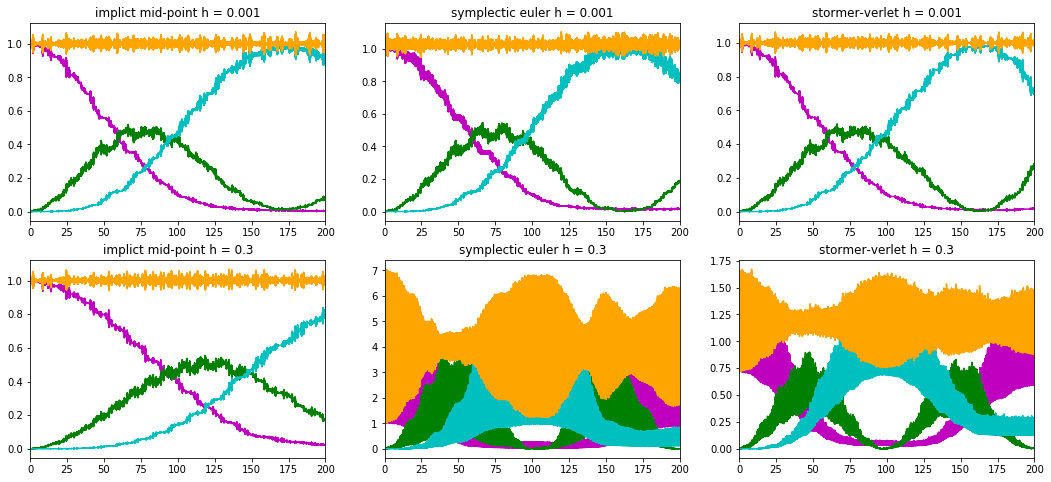

In [40]:
fpu_test()